# Kinetic CO adsorption/desorption study on Pd single atoms supported on Au(111): a 'pump probe' approach

## Figures: 

In [977]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np 
from matplotlib import ticker
print(plt.style.available)
import os
import string

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


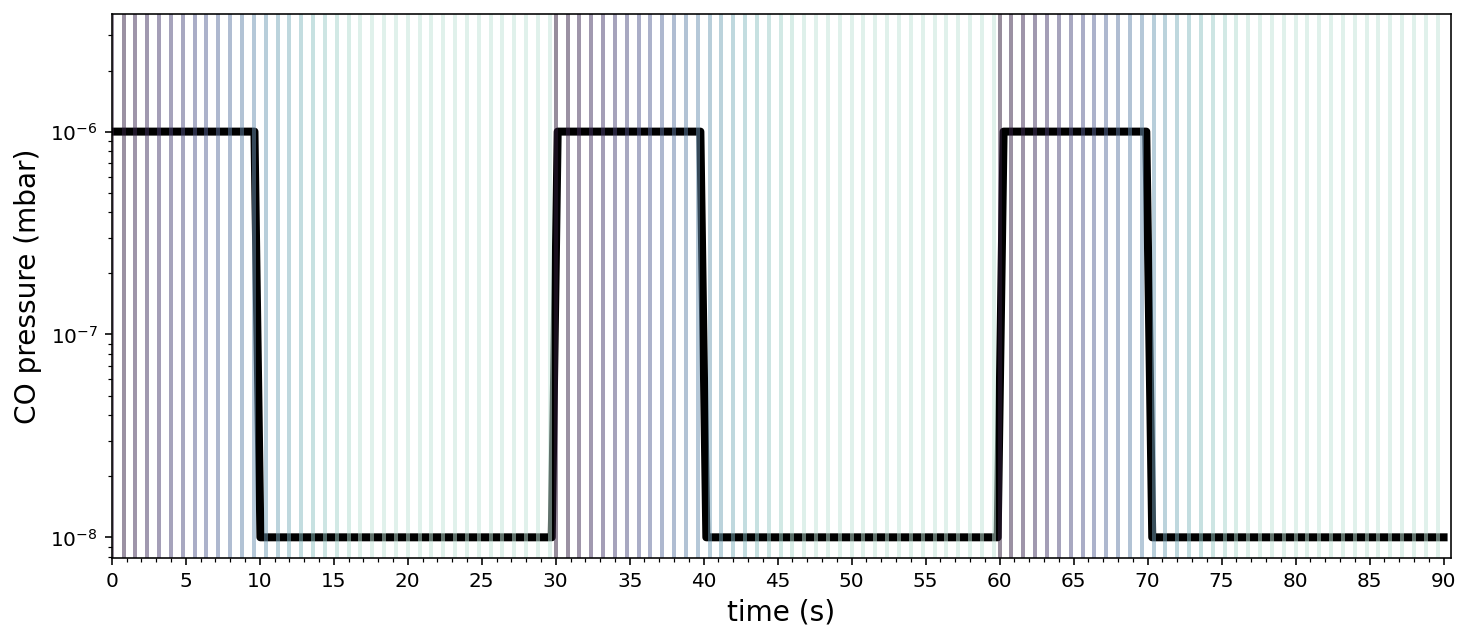

In [985]:
adsorption_time = 10 # seconds
spectrum_time = 0.4
adsorption_spectra = int(adsorption_time /  spectrum_time)

desorption_time = 20 # seconds
desorption_spectra = int(desorption_time / spectrum_time)

number_of_cycles = 3

total_time = (desorption_time + adsorption_time) * number_of_cycles

fig,ax=plt.subplots(figsize=(12,5),constrained_layout=False)
CO_pressure = np.concatenate((np.ones(adsorption_spectra)*1e-6,np.zeros(desorption_spectra) + 1e-8)*number_of_cycles)

ax.plot(np.linspace(0,total_time,CO_pressure.shape[0]),
         CO_pressure,color='black',linewidth=4)
ax.set_ylabel(u'CO pressure (mbar)',size=14)
ax.set_xlabel('time (s)',size=14)
ax.set_yscale('log')

no_labels = secax.set_xticklabels([])
ax.minorticks_on()
ax.locator_params(axis='x',nbins=20)
plt.xlim(left=0,right=90.5)
plt.ylim(top=3.8e-6)

color_palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True,reverse=True)

for cycle in range(number_of_cycles):
    cycle_time = cycle * (adsorption_time + desorption_time)
    for i,line in enumerate(range(adsorption_spectra + desorption_spectra)):
        if i % 2 == 0:
            plt.axvline(x=cycle_time + (line*spectrum_time),c=color_palette(i*6),linewidth=2,alpha=0.5)

fig.savefig('pulses.jpg', dpi=300, bbox_inches='tight')


In [ ]:
# To generate fake data
def decay(number_of_values,decay_rate):
    values = np.linspace(0,1,number_of_values)
    return np.exp(-values*decay_rate)

def rise(x,rise_rate):
    x = np.arange(x)
    return (x*rise_rate)  / ( 1 + rise_rate*x )

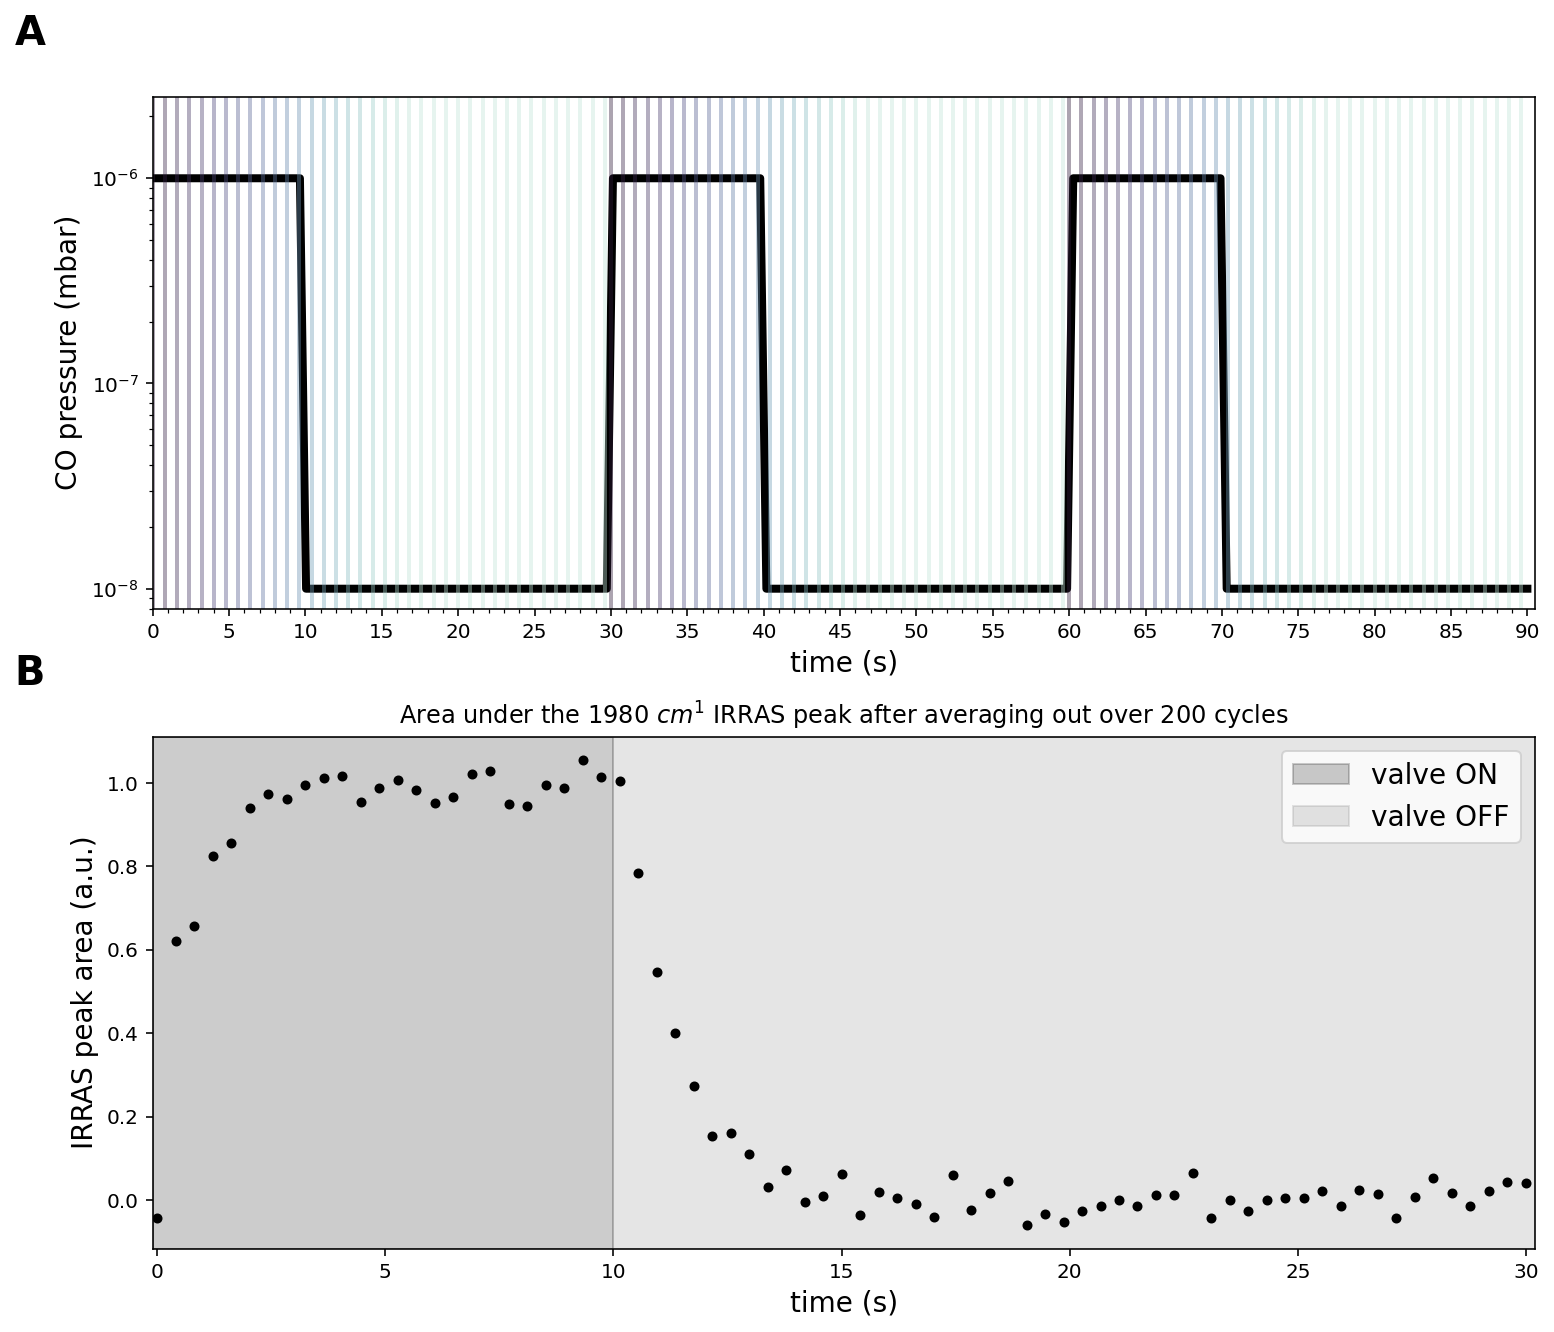

In [993]:
adsorption_time = 10 # seconds
spectrum_time = 0.4
adsorption_spectra = int(adsorption_time /  spectrum_time)

desorption_time = 20 # seconds
desorption_spectra = int(desorption_time / spectrum_time)

number_of_cycles = 3

total_time = (desorption_time + adsorption_time) * number_of_cycles
CO_pressure = np.concatenate((np.ones(adsorption_spectra)*1e-6,np.zeros(desorption_spectra)+1e-8)*number_of_cycles)


fig,ax=plt.subplots(2,1,figsize=(12,10),sharex=False,constrained_layout=False)

ax[0].plot(np.linspace(0,total_time,CO_pressure.shape[0]),
         CO_pressure,color='black',linewidth=4)
ax[0].set_ylabel(u'CO pressure (mbar)',size=14)
ax[0].set_xlabel('time (s)',size=14)

no_labels = secax.set_xticklabels([])
ax[0].minorticks_on()
ax[0].locator_params(axis='x',nbins=20)
ax[0].set_xlim(left=0,right=90.5)
ax[0].set_ylim(bottom=8e-9,top=2.5e-6)  
ax[0].set_yscale('log')
ax[0].text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax[0].transAxes, 
            size=20, weight='bold')


color_palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True,reverse=True)
for cycle in range(number_of_cycles):
    cycle_time = cycle * (adsorption_time + desorption_time)
    for i,line in enumerate(range(adsorption_spectra + desorption_spectra)):
        if i % 2 == 0:
            ax[0].axvline(x=cycle_time + (line*spectrum_time),c=color_palette(i*6),linewidth=2,alpha=0.4)

rise_spectra = int(adsorption_spectra*0.2) 
constant_spectra_ads = adsorption_spectra - rise_spectra 
rise_rate = 1.3
area_adsorption = np.concatenate((rise(rise_spectra,rise_rate),
                                  np.ones(constant_spectra_ads)))

decay_rate = 6.1
decay_spectra = int(adsorption_spectra*0.9) 
constant_spectra_ads = desorption_spectra - decay_spectra 
area_desorption = np.concatenate((decay(decay_spectra,decay_rate),np.zeros(constant_spectra_ads)))
irras_peak_area = np.concatenate((area_adsorption,area_desorption)*1)
irras_peak_area_noisy = irras_peak_area + np.random.normal(loc=0.,scale=0.03,size=irras_peak_area.shape[0])




ax[1].set_title('Area under the 1980 $cm^1$ IRRAS peak after averaging out over 200 cycles')
ax[1].plot(np.linspace(0,adsorption_time + desorption_time,irras_peak_area.shape[0]),
         irras_peak_area_noisy,'bo',color='black',linewidth=5,markersize=4)
ax[1].set_xlim(left=-0.1,right=(adsorption_time+desorption_time + 0.2))
ax[1].set_ylabel('IRRAS peak area (a.u.)',size=14)
ax[1].set_xlabel('time (s)',size=14)   

ax[1].axvspan(-0.1, adsorption_time, alpha=0.2, color='black',label='valve ON')
ax[1].axvspan(adsorption_time, (adsorption_time+desorption_time + 0.2), alpha=0.2, color='gray',label='valve OFF')
ax[1].legend(fontsize=14)
ax[1].text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax[1].transAxes, 
            size=20, weight='bold')
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.25)

fig.savefig('manypulses.jpg', dpi=300, bbox_inches='tight')

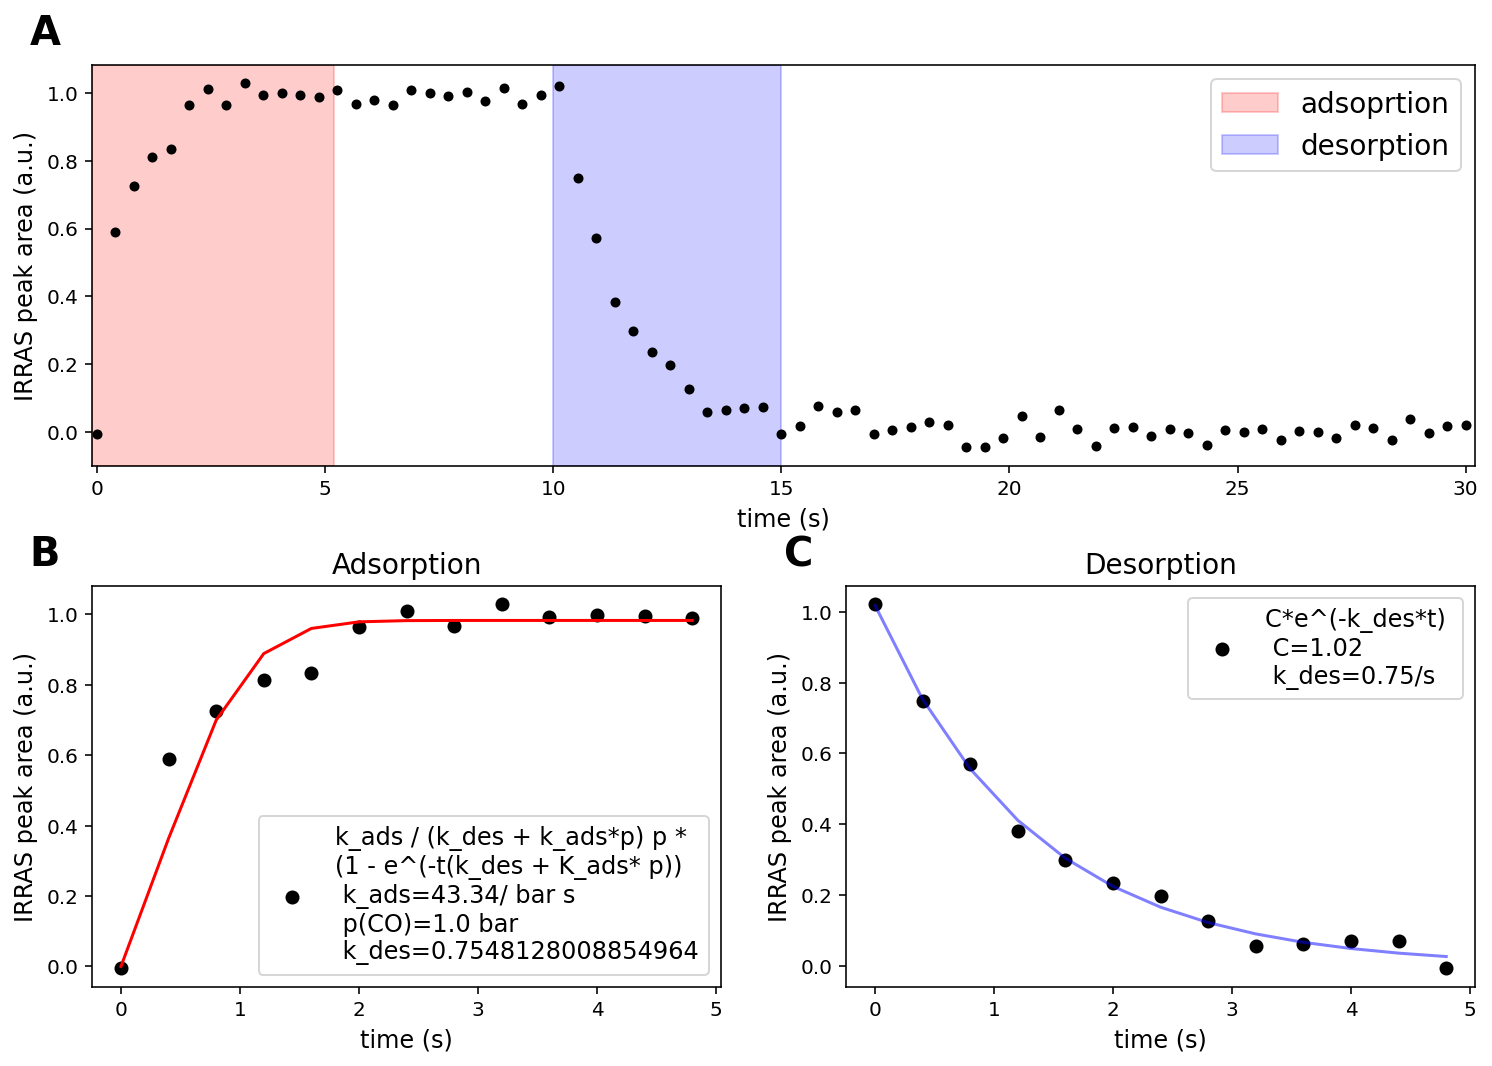

In [969]:
from scipy import stats
from scipy.optimize import least_squares
import scipy.optimize as optimization
import math

adsorption_rise = irras_peak_area_noisy[:rise_spectra+2]
plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(np.linspace(0,adsorption_time + desorption_time,irras_peak_area.shape[0]),
         irras_peak_area_noisy,'bo',color='black',linewidth=4,markersize=4)
ax1.axvspan(-0.1, (adsorption_rise.shape[0]+6)*spectrum_time, alpha=0.2, color='red',label='adsoprtion')

desor_decay_time = 5.
spectra_decay = int(desor_decay_time/spectrum_time)

ax1.axvspan(adsorption_time, adsorption_time + desor_decay_time, alpha=0.2, color='blue',label='desorption')
ax1.set_xlim(left=-0.1,right=(adsorption_time+desorption_time + 0.2))
ax1.set_ylabel('IRRAS peak area (a.u.)',size=12)
ax1.set_xlabel('time (s)',size=12)  
ax1.legend(fontsize=14)
ax1.text(-0.045, 1.05, string.ascii_uppercase[0], transform=ax1.transAxes, 
            size=20, weight='bold')



x_des= np.arange(0,desor_decay_time,spectrum_time)
y_des= irras_peak_area_noisy[adsorption_spectra:adsorption_spectra + spectra_decay + 1]
x0_des = np.array([0.0, 0.0]) # initial guesses

def func(x_des, a, b):
    return a*np.exp(-b*x_des)

opt_des = optimization.curve_fit(func, x_des, y_des, x0_des)

ax3 = plt.subplot(224)
ax3.plot(np.arange(0,desor_decay_time,spectrum_time),
         irras_peak_area_noisy[adsorption_spectra:adsorption_spectra + spectra_decay + 1],'o',c='black')
k_des = opt_des[0][1]
ax3.plot(x_des,func(x_des,opt_des[0][0],k_des),c='blue',alpha=0.5)

ax3.legend([f'C*e^(-k_des*t) \n C={opt_des[0][0]:.2f}  \n k_des={k_des:.2f}/s'],loc='upper right',fontsize=12)
ax3.set_ylabel('IRRAS peak area (a.u.)',size=12)
ax3.set_xlabel('time (s)',size=12)  
ax3.set_title('Desorption',size=14) 
ax3.text(-0.1, 1.05, string.ascii_uppercase[2], transform=ax3.transAxes, 
            size=20, weight='bold')

#######

x_ads= np.arange(0,(adsorption_rise.shape[0] + 6)*spectrum_time,spectrum_time)
y_ads= irras_peak_area_noisy[:(adsorption_rise.shape[0] + 6)]
x0_ads = np.array([50.0]) # initial guesses
p = 1. # bar. fake pressure for fitting

def func_ads(x_ads, k_ads):
    return (k_ads / (k_des + k_ads*p)) * p * ( 1 - np.exp(-x_ads*(k_des + p*x_ads) ) )

opt_ads = optimization.curve_fit(func_ads, x_ads, y_ads, x0_ads)

ax2 = plt.subplot(223)
ax2.plot(x_ads,y_ads,'o',color='black')
ax2.plot(x_ads,func_ads(x_ads,opt_ads[0][0]),color='red')
ax2.legend([f'k_ads / (k_des + k_ads*p) p * \n(1 - e^(-t(k_des + K_ads* p)) \n k_ads={opt_ads[0][0]:.2f}/ bar s  \n p(CO)={p} bar \n k_des={k_des}'],loc='lower right',fontsize=12)

ax2.set_ylabel('IRRAS peak area (a.u.)',size=12)
ax2.set_xlabel('time (s)',size=12) 
ax2.set_title('Adsorption',size=14) 
#####
ax2.text(-0.1, 1.05, string.ascii_uppercase[1], transform=ax2.transAxes, 
            size=20, weight='bold')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.3)

plt.savefig('fitting_reg1.jpg', dpi=300, bbox_inches='tight')
 